In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yejin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
url='https://www.forbes.com/sites/adrianbridgwater/2019/04/15/what-drove-the-ai-renaissance/'

In [28]:
import requests
from bs4 import BeautifulSoup

resp = requests.get(url)
soup = BeautifulSoup(resp.text,'html.parser')
eng_news = soup.select('.article-body p')
len(eng_news)

23

In [29]:
article = [p.text for p in eng_news[1:10]]
article

['It is the present-day darling of the tech world. The current renaissance of Artificial Intelligence (AI) with its sister discipline Machine Learning (ML) has led every IT firm worth its salt to engineer some form of AI onto its platform, into its toolsets and throughout its software applications.',
 'IBM CEO Ginni Rometty has already proclaimed that AI will change 100 percent of jobs over the next decade.',
 "And yes, she does mean everybody's job from yours to mine and onward to the role of grain farmers in Egypt, pastry chefs in Paris and dog walkers in Oregon i.e. every job. We will now be able to help direct all workers’ actions and behavior with a new degree of intelligence that comes from predictive analytics, all stemming from the AI engines we will now increasingly depend upon.",
 'When did it all go so right?',
 'But AI used to be a fanciful notion mostly confined science fiction, so when did it all go right?',
 'In recent years we’ve had some big changes in technology. Asid

In [30]:
text = '\n'.join(article)
text

"It is the present-day darling of the tech world. The current renaissance of Artificial Intelligence (AI) with its sister discipline Machine Learning (ML) has led every IT firm worth its salt to engineer some form of AI onto its platform, into its toolsets and throughout its software applications.\nIBM CEO Ginni Rometty has already proclaimed that AI will change 100 percent of jobs over the next decade.\nAnd yes, she does mean everybody's job from yours to mine and onward to the role of grain farmers in Egypt, pastry chefs in Paris and dog walkers in Oregon i.e. every job. We will now be able to help direct all workers’ actions and behavior with a new degree of intelligence that comes from predictive analytics, all stemming from the AI engines we will now increasingly depend upon.\nWhen did it all go so right?\nBut AI used to be a fanciful notion mostly confined science fiction, so when did it all go right?\nIn recent years we’ve had some big changes in technology. Aside from the proli

In [31]:
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(text)
print(word_tokens[:30])

['It', 'is', 'the', 'present-day', 'darling', 'of', 'the', 'tech', 'world', '.', 'The', 'current', 'renaissance', 'of', 'Artificial', 'Intelligence', '(', 'AI', ')', 'with', 'its', 'sister', 'discipline', 'Machine', 'Learning', '(', 'ML', ')', 'has', 'led']


In [32]:
text = 'Good muffins cost $3.88\nin New York. Please buy me\ntwo of them.\n\nThanks.'
print(word_tokenize(text))

['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


In [33]:
# 규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.
# 규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.
from nltk.tokenize import TreebankWordTokenizer
word_tokens = TreebankWordTokenizer().tokenize(text)

In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yejin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
from nltk import pos_tag
pos_tagged = pos_tag(word_tokens)

In [36]:
nouns = []
for word,pos in pos_tagged:
    if pos[0] == 'N':
        nouns.append(word)
nouns

['muffins', 'New', 'York.', 'Please', 'Thanks']

In [37]:
pos_tagged

[('Good', 'JJ'),
 ('muffins', 'NNS'),
 ('cost', 'VBP'),
 ('$', '$'),
 ('3.88', 'CD'),
 ('in', 'IN'),
 ('New', 'NNP'),
 ('York.', 'NNP'),
 ('Please', 'NNP'),
 ('buy', 'VB'),
 ('me', 'PRP'),
 ('two', 'CD'),
 ('of', 'IN'),
 ('them.', 'JJ'),
 ('Thanks', 'NNP'),
 ('.', '.')]

In [38]:
import nltk
import numpy as np

In [39]:
nltk.download('words')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Yejin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Yejin\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [40]:
text

'Good muffins cost $3.88\nin New York. Please buy me\ntwo of them.\n\nThanks.'

In [41]:
from nltk import ne_chunk
from nltk.tokenize import word_tokenize

word_tokens = word_tokenize(text)
word_tokens

['Good',
 'muffins',
 'cost',
 '$',
 '3.88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

In [42]:
from nltk import pos_tag
pos_tagged = pos_tag(word_tokens)
pos_tagged

[('Good', 'JJ'),
 ('muffins', 'NNS'),
 ('cost', 'VBP'),
 ('$', '$'),
 ('3.88', 'CD'),
 ('in', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('.', '.'),
 ('Please', 'NNP'),
 ('buy', 'VB'),
 ('me', 'PRP'),
 ('two', 'CD'),
 ('of', 'IN'),
 ('them', 'PRP'),
 ('.', '.'),
 ('Thanks', 'NNS'),
 ('.', '.')]

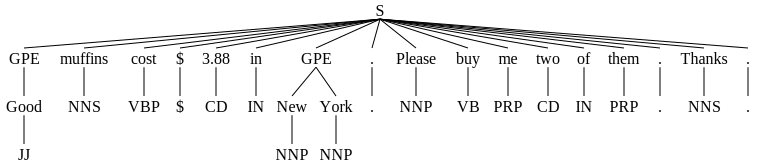

In [43]:
ne_tokens = ne_chunk(pos_tagged)
ne_tokens

In [44]:
print(ne_tokens)

(S
  (GPE Good/JJ)
  muffins/NNS
  cost/VBP
  $/$
  3.88/CD
  in/IN
  (GPE New/NNP York/NNP)
  ./.
  Please/NNP
  buy/VB
  me/PRP
  two/CD
  of/IN
  them/PRP
  ./.
  Thanks/NNS
  ./.)


In [45]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

In [46]:
doc.ents

(3.88, New York, two)

In [47]:
for token in doc:
    print(token.text, token.pos_)

Good ADJ
muffins NOUN
cost VERB
$ SYM
3.88 NUM

 SPACE
in ADP
New PROPN
York PROPN
. PUNCT
Please INTJ
buy VERB
me PRON

 SPACE
two NUM
of ADP
them PRON
. PUNCT


 SPACE
Thanks X
. PUNCT


In [48]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

print("running ->",ps.stem("running"))

running -> run


In [53]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yejin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yejin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()

print("believes ->",wn.lemmatize("believes"))

believes -> belief


In [54]:
from nltk.corpus import stopwords

In [55]:
stop_pos = ['IN','CC','UH','TO','MD','DT','VBZ','VBP']

In [56]:
url='https://www.forbes.com/sites/adrianbridgwater/2019/04/15/what-drove-the-ai-renaissance/'
resp = requests.get(url)
html = BeautifulSoup(resp.text,'html.parser')
eng_news=html.select('.article-body p')
article = [p.text for p in eng_news[1:10]]
text = '\n'.join(article)

In [59]:
word_tokens = word_tokenize(text)
pos_tagged = pos_tag(word_tokens)
pos_tagged

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('present-day', 'JJ'),
 ('darling', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('tech', 'JJ'),
 ('world', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('current', 'JJ'),
 ('renaissance', 'NN'),
 ('of', 'IN'),
 ('Artificial', 'JJ'),
 ('Intelligence', 'NNP'),
 ('(', '('),
 ('AI', 'NNP'),
 (')', ')'),
 ('with', 'IN'),
 ('its', 'PRP$'),
 ('sister', 'NN'),
 ('discipline', 'NN'),
 ('Machine', 'NNP'),
 ('Learning', 'NNP'),
 ('(', '('),
 ('ML', 'NNP'),
 (')', ')'),
 ('has', 'VBZ'),
 ('led', 'VBN'),
 ('every', 'DT'),
 ('IT', 'NNP'),
 ('firm', 'NN'),
 ('worth', 'VBD'),
 ('its', 'PRP$'),
 ('salt', 'NN'),
 ('to', 'TO'),
 ('engineer', 'VB'),
 ('some', 'DT'),
 ('form', 'NN'),
 ('of', 'IN'),
 ('AI', 'NNP'),
 ('onto', 'IN'),
 ('its', 'PRP$'),
 ('platform', 'NN'),
 (',', ','),
 ('into', 'IN'),
 ('its', 'PRP$'),
 ('toolsets', 'NNS'),
 ('and', 'CC'),
 ('throughout', 'IN'),
 ('its', 'PRP$'),
 ('software', 'NN'),
 ('applications', 'NNS'),
 ('.', '.'),
 ('IBM', 'NNP'),
 

In [60]:
words = []

for word,pos in pos_tagged:
    if word.lower() not in stopwords.words('english') and pos not in stop_pos:
        words.append(word)
len(words)

263

In [61]:
words

['present-day',
 'darling',
 'tech',
 'world',
 '.',
 'current',
 'renaissance',
 'Artificial',
 'Intelligence',
 '(',
 'AI',
 ')',
 'sister',
 'discipline',
 'Machine',
 'Learning',
 '(',
 'ML',
 ')',
 'led',
 'firm',
 'worth',
 'salt',
 'engineer',
 'form',
 'AI',
 'platform',
 ',',
 'toolsets',
 'software',
 'applications',
 '.',
 'IBM',
 'CEO',
 'Ginni',
 'Rometty',
 'already',
 'proclaimed',
 'AI',
 'change',
 '100',
 'percent',
 'jobs',
 'next',
 'decade',
 '.',
 ',',
 'mean',
 'everybody',
 "'s",
 'job',
 'mine',
 'onward',
 'role',
 'grain',
 'farmers',
 'Egypt',
 ',',
 'pastry',
 'chefs',
 'Paris',
 'dog',
 'walkers',
 'Oregon',
 'i.e',
 '.',
 'job',
 '.',
 'able',
 'help',
 'direct',
 'workers',
 'actions',
 'behavior',
 'new',
 'degree',
 'intelligence',
 'predictive',
 'analytics',
 ',',
 'stemming',
 'AI',
 'increasingly',
 'upon',
 '.',
 'right',
 '?',
 'AI',
 'used',
 'fanciful',
 'notion',
 'mostly',
 'confined',
 'science',
 'fiction',
 ',',
 'go',
 'right',
 '?',
 're

In [63]:
from collections import Counter

In [64]:
Counter(words).most_common()
#데이터 개수 세기
#.most_common(): 데이터 개수 많은 순으로 배열 리턴

[(',', 19),
 ('.', 14),
 ('AI', 9),
 ('data', 7),
 ('(', 4),
 (')', 4),
 ('become', 4),
 ('?', 3),
 ('lot', 3),
 ('easier', 3),
 ('tech', 2),
 ('world', 2),
 ('renaissance', 2),
 ('form', 2),
 ('platform', 2),
 ('applications', 2),
 ('job', 2),
 ('new', 2),
 ('analytics', 2),
 ('right', 2),
 ('years', 2),
 ('changes', 2),
 ('power', 2),
 ('“', 2),
 ('compute', 2),
 ('access', 2),
 ('”', 2),
 ('Dunning', 2),
 ('present-day', 1),
 ('darling', 1),
 ('current', 1),
 ('Artificial', 1),
 ('Intelligence', 1),
 ('sister', 1),
 ('discipline', 1),
 ('Machine', 1),
 ('Learning', 1),
 ('ML', 1),
 ('led', 1),
 ('firm', 1),
 ('worth', 1),
 ('salt', 1),
 ('engineer', 1),
 ('toolsets', 1),
 ('software', 1),
 ('IBM', 1),
 ('CEO', 1),
 ('Ginni', 1),
 ('Rometty', 1),
 ('already', 1),
 ('proclaimed', 1),
 ('change', 1),
 ('100', 1),
 ('percent', 1),
 ('jobs', 1),
 ('next', 1),
 ('decade', 1),
 ('mean', 1),
 ('everybody', 1),
 ("'s", 1),
 ('mine', 1),
 ('onward', 1),
 ('role', 1),
 ('grain', 1),
 ('farmers

In [65]:
stemmed_words = []
for word in words:
    stemmed_words.append(ps.stem(word))
    
lemmed_words = []
for word in words:
    lemmed_words.append(wn.lemmatize(word))
#일반적으로 stem보다 lem이 더 정확하게 어근 단어를 찾아줌

In [66]:
Counter(lemmed_words).most_common()

[(',', 19),
 ('.', 14),
 ('AI', 9),
 ('data', 7),
 ('(', 4),
 (')', 4),
 ('become', 4),
 ('change', 3),
 ('job', 3),
 ('?', 3),
 ('lot', 3),
 ('easier', 3),
 ('tech', 2),
 ('world', 2),
 ('renaissance', 2),
 ('form', 2),
 ('platform', 2),
 ('application', 2),
 ('new', 2),
 ('analytics', 2),
 ('right', 2),
 ('year', 2),
 ('power', 2),
 ('“', 2),
 ('compute', 2),
 ('access', 2),
 ('”', 2),
 ('Dunning', 2),
 ('present-day', 1),
 ('darling', 1),
 ('current', 1),
 ('Artificial', 1),
 ('Intelligence', 1),
 ('sister', 1),
 ('discipline', 1),
 ('Machine', 1),
 ('Learning', 1),
 ('ML', 1),
 ('led', 1),
 ('firm', 1),
 ('worth', 1),
 ('salt', 1),
 ('engineer', 1),
 ('toolsets', 1),
 ('software', 1),
 ('IBM', 1),
 ('CEO', 1),
 ('Ginni', 1),
 ('Rometty', 1),
 ('already', 1),
 ('proclaimed', 1),
 ('100', 1),
 ('percent', 1),
 ('next', 1),
 ('decade', 1),
 ('mean', 1),
 ('everybody', 1),
 ("'s", 1),
 ('mine', 1),
 ('onward', 1),
 ('role', 1),
 ('grain', 1),
 ('farmer', 1),
 ('Egypt', 1),
 ('pastry', 

In [67]:
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt
hannanum=Hannanum()
kkma=Kkma()
komoran=Komoran()
mecab=Mecab()
okt=Okt()

In [68]:
import re

import requests
from bs4 import BeautifulSoup

In [69]:
url="https://news.naver.com/main/read.naver?mode=LS2D&mid=shm&sid1=101&sid2=258&oid=015&aid=0004655938"
headers = {'user-agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"}
response=requests.get(url,headers=headers)
html = BeautifulSoup(response.text,'html.parser')

In [70]:
article = html.select_one("#articleBodyContents").text
article

'\n\n\n\n\n오늘은 중국주식에 투자하는 분이라면 한 번 쯤은 들어보셨을 법한, 하지만 너무 복잡하고 낯설어서 잘 이해가 가지 않는 얘기를 좀 해보려고 합니다. 중국 기업이 해외에 상장할 때 쓰는 독특한 구조인 가변이익실체 얘깁니다. 영어로는 variable interest entity, 줄여서 VIE라고 하는데요. 그동안 베이징나우나 기사를 통해서 몇 번 소개해 드리긴 했는데, 최근 중국이 새로 규정도 만들고 해서 이번 기회에 종합 정리를 좀 해볼까 합니다.사진=REUTERS 지분 관계 없이 계약으로만 기업을 지배지난해 많은 투자자들을 울린 디디추싱을 예로 들어서 설명을 좀 해보겠습니다. 가변이익실체에는 보통 4개의 회사가 등장합니다. 벌써 복잡해지기 시작하죠?1번, 편의상 A라고 하겠습니다. A는 중국에서 사업하는 실체 회사입니다. 디디추싱에 대입해 보면, 밑에 중국 전역에서 디디추싱이라는 이름으로 승차호출 서비스를 하고 있는 여러 자회사들을 거느리고 있는 지주회사인 베이징샤오쥐라고 하겠습니다.2번은 A를 지배하는 페이퍼컴퍼니인 B입니다. B는 A의 주식을 한 주도 갖지 않습니다. 그냥 B가 A를 지배한다는 계약만 맺습니다. 이 계약이 가변이익실체 구조의 핵심입니다. 물론 A와 B의 실제 주인은 똑같습니다. 그러니 A가 계약을 파기하거나 할 우려는 매우 적습니다. 디디추싱에 대입하면 베이징디디라는 페이퍼컴퍼니입니다.여기까지는 중국 본토 내 기업들이고요, 다음은 본토 밖 기업들입니다. 3번은 B를 100% 보유하는 홍콩 페이퍼컴퍼니입니다. C라고 하겠습니다. 디디추싱에선 홍콩샤오쥐입니다. 아까 중국 본토 지주회사가 베이징샤오쥐라고 했는데요, 홍콩 페이퍼컴퍼니는 홍콩샤오쥐입니다. 샤오쥐는 귤인데요, 디디추싱은 자전거 공유 브랜드에는 칭쥐, 청귤이라는 이름을 붙였습니다. 귤을 여기저기에 갖다 붙이고 있습니다.4번이자 D는 홍콩 페이퍼컴퍼니를 100% 보유하는 해외 페이퍼컴퍼니입니다. 보통 조세회피처인 영국령 케이만이나 버진아일랜드에 세웁니다. 디디추싱은 이

In [71]:
from nltk import sent_tokenize
sentences = sent_tokenize(article)
len(sentences)

68

In [72]:
sentence = sentences[0].strip()
sentence

'오늘은 중국주식에 투자하는 분이라면 한 번 쯤은 들어보셨을 법한, 하지만 너무 복잡하고 낯설어서 잘 이해가 가지 않는 얘기를 좀 해보려고 합니다.'

In [73]:
komoran.morphs(sentence)

['오늘',
 '은',
 '중국',
 '주식',
 '에',
 '투자',
 '하',
 '는',
 '분',
 '이',
 '라면',
 '한',
 '번',
 '쯤',
 '은',
 '들',
 '어',
 '보',
 '시',
 '었',
 '을',
 '법',
 '하',
 'ㄴ',
 ',',
 '하지만',
 '너무',
 '복잡',
 '하',
 '고',
 '낯설',
 '어서',
 '잘',
 '이해',
 '가',
 '가지',
 '않',
 '는',
 '얘기',
 '를',
 '좀',
 '해보',
 '려고',
 '하',
 'ㅂ니다',
 '.']

In [75]:
hannanum.morphs(sentence)

['오늘',
 '은',
 '중국주식',
 '에',
 '투자하',
 '는',
 '분',
 '이',
 '라면',
 '하',
 'ㄴ',
 '번',
 '쯤',
 '은',
 '들',
 '어',
 '보',
 '셨을',
 '법',
 '하',
 'ㄴ',
 ',',
 '하',
 '지만',
 '너무',
 '복잡',
 '하고',
 '낯설',
 '어서',
 '잘',
 '이해',
 '가',
 '가지',
 '않',
 '는',
 '얘',
 '이',
 '기',
 '를',
 '좀',
 '하',
 '어',
 '보',
 '려고',
 '하',
 'ㅂ니다',
 '.']

In [76]:
okt.morphs(sentence)

['오늘',
 '은',
 '중국',
 '주식',
 '에',
 '투자',
 '하는',
 '분이라면',
 '한',
 '번',
 '쯤',
 '은',
 '들어',
 '보셨을',
 '법',
 '한',
 ',',
 '하지만',
 '너무',
 '복잡하고',
 '낯설어서',
 '잘',
 '이해',
 '가',
 '가지',
 '않는',
 '얘기',
 '를',
 '좀',
 '해보려고',
 '합니다',
 '.']

In [77]:
kkma.morphs(sentence)

['오늘',
 '은',
 '중국',
 '주식',
 '에',
 '투자',
 '하',
 '는',
 '분',
 '이',
 '라면',
 '한',
 '번',
 '쯤',
 '은',
 '들어보',
 '시',
 '었',
 '을',
 '법',
 '하',
 'ㄴ',
 ',',
 '하지만',
 '너무',
 '복잡',
 '하',
 '고',
 '낯설',
 '어서',
 '잘',
 '이해',
 '가',
 '가',
 '지',
 '않',
 '는',
 '얘기',
 '를',
 '좀',
 '해보',
 '려고',
 '하',
 'ㅂ니다',
 '.']

In [78]:
mecab.morphs(sentence)

['오늘',
 '은',
 '중국',
 '주식',
 '에',
 '투자',
 '하',
 '는',
 '분',
 '이',
 '라면',
 '한',
 '번',
 '쯤',
 '은',
 '들',
 '어',
 '보',
 '셨',
 '을',
 '법',
 '한',
 ',',
 '하지만',
 '너무',
 '복잡',
 '하',
 '고',
 '낯설',
 '어서',
 '잘',
 '이해',
 '가',
 '가',
 '지',
 '않',
 '는',
 '얘기',
 '를',
 '좀',
 '해',
 '보',
 '려고',
 '합니다',
 '.']

In [79]:
komoran.pos(sentence)

[('오늘', 'NNG'),
 ('은', 'JX'),
 ('중국', 'NNP'),
 ('주식', 'NNP'),
 ('에', 'JKB'),
 ('투자', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('분', 'NNB'),
 ('이', 'VCP'),
 ('라면', 'EC'),
 ('한', 'MM'),
 ('번', 'NNB'),
 ('쯤', 'NNB'),
 ('은', 'JX'),
 ('들', 'VV'),
 ('어', 'EC'),
 ('보', 'VX'),
 ('시', 'EP'),
 ('었', 'EP'),
 ('을', 'ETM'),
 ('법', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETM'),
 (',', 'SP'),
 ('하지만', 'MAJ'),
 ('너무', 'MAG'),
 ('복잡', 'XR'),
 ('하', 'XSA'),
 ('고', 'EC'),
 ('낯설', 'VA'),
 ('어서', 'EC'),
 ('잘', 'MAG'),
 ('이해', 'NNG'),
 ('가', 'JKS'),
 ('가지', 'NNB'),
 ('않', 'VX'),
 ('는', 'ETM'),
 ('얘기', 'NNG'),
 ('를', 'JKO'),
 ('좀', 'MAG'),
 ('해보', 'VV'),
 ('려고', 'EC'),
 ('하', 'VX'),
 ('ㅂ니다', 'EF'),
 ('.', 'SF')]

In [80]:
mecab.pos(sentence)

[('오늘', 'NNG'),
 ('은', 'JX'),
 ('중국', 'NNP'),
 ('주식', 'NNG'),
 ('에', 'JKB'),
 ('투자', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('분', 'NNB'),
 ('이', 'VCP'),
 ('라면', 'EC'),
 ('한', 'MM'),
 ('번', 'NNBC'),
 ('쯤', 'NNG'),
 ('은', 'JX'),
 ('들', 'VV'),
 ('어', 'EC'),
 ('보', 'VX'),
 ('셨', 'EP+EP'),
 ('을', 'ETM'),
 ('법', 'NNG'),
 ('한', 'XSA+ETM'),
 (',', 'SC'),
 ('하지만', 'MAJ'),
 ('너무', 'MAG'),
 ('복잡', 'XR'),
 ('하', 'XSA'),
 ('고', 'EC'),
 ('낯설', 'VA'),
 ('어서', 'EC'),
 ('잘', 'MAG'),
 ('이해', 'NNG'),
 ('가', 'JKS'),
 ('가', 'VV'),
 ('지', 'EC'),
 ('않', 'VX'),
 ('는', 'ETM'),
 ('얘기', 'NNG'),
 ('를', 'JKO'),
 ('좀', 'MAG'),
 ('해', 'VV+EC'),
 ('보', 'VX'),
 ('려고', 'EC'),
 ('합니다', 'VX+EF'),
 ('.', 'SF')]

In [82]:
import nltk
from nltk import bigrams,word_tokenize
from nltk.util import ngrams

In [84]:
bigram_list = bigrams(mecab.morphs(sentence))
bigram_list

<generator object bigrams at 0x00000203FA6F3F48>

In [85]:
for token in bigram_list:
    print(token)

('오늘', '은')
('은', '중국')
('중국', '주식')
('주식', '에')
('에', '투자')
('투자', '하')
('하', '는')
('는', '분')
('분', '이')
('이', '라면')
('라면', '한')
('한', '번')
('번', '쯤')
('쯤', '은')
('은', '들')
('들', '어')
('어', '보')
('보', '셨')
('셨', '을')
('을', '법')
('법', '한')
('한', ',')
(',', '하지만')
('하지만', '너무')
('너무', '복잡')
('복잡', '하')
('하', '고')
('고', '낯설')
('낯설', '어서')
('어서', '잘')
('잘', '이해')
('이해', '가')
('가', '가')
('가', '지')
('지', '않')
('않', '는')
('는', '얘기')
('얘기', '를')
('를', '좀')
('좀', '해')
('해', '보')
('보', '려고')
('려고', '합니다')
('합니다', '.')


In [86]:
trigram_list = ngrams(mecab.morphs(sentence), 3)
trigram_list

In [87]:
for token in trigram_list:
    print(token)

('오늘', '은', '중국')
('은', '중국', '주식')
('중국', '주식', '에')
('주식', '에', '투자')
('에', '투자', '하')
('투자', '하', '는')
('하', '는', '분')
('는', '분', '이')
('분', '이', '라면')
('이', '라면', '한')
('라면', '한', '번')
('한', '번', '쯤')
('번', '쯤', '은')
('쯤', '은', '들')
('은', '들', '어')
('들', '어', '보')
('어', '보', '셨')
('보', '셨', '을')
('셨', '을', '법')
('을', '법', '한')
('법', '한', ',')
('한', ',', '하지만')
(',', '하지만', '너무')
('하지만', '너무', '복잡')
('너무', '복잡', '하')
('복잡', '하', '고')
('하', '고', '낯설')
('고', '낯설', '어서')
('낯설', '어서', '잘')
('어서', '잘', '이해')
('잘', '이해', '가')
('이해', '가', '가')
('가', '가', '지')
('가', '지', '않')
('지', '않', '는')
('않', '는', '얘기')
('는', '얘기', '를')
('얘기', '를', '좀')
('를', '좀', '해')
('좀', '해', '보')
('해', '보', '려고')
('보', '려고', '합니다')
('려고', '합니다', '.')


In [88]:
import pandas as pd

docs = ["오늘 동물원에서 원숭이를 봤어",
     "오늘 동물원에서 코끼리를 봤어 봤어",
     "동물원에서 원숭이에게 바나나를 줬어 바나나를"]

In [89]:
doc_ls = [doc.split() for doc in docs]
doc_ls

[['오늘', '동물원에서', '원숭이를', '봤어'],
 ['오늘', '동물원에서', '코끼리를', '봤어', '봤어'],
 ['동물원에서', '원숭이에게', '바나나를', '줬어', '바나나를']]

In [90]:
word2id={}

index=0
for doc in doc_ls:
    for token in doc:
        if token not in word2id:
            word2id[token] = index
            index+=1
word2id

{'오늘': 0,
 '동물원에서': 1,
 '원숭이를': 2,
 '봤어': 3,
 '코끼리를': 4,
 '원숭이에게': 5,
 '바나나를': 6,
 '줬어': 7}

In [91]:
word2id = {}

for doc in doc_ls:
    for token in doc:
        if token not in word2id:
            word2id[token] = len(word2id)
word2id

{'오늘': 0,
 '동물원에서': 1,
 '원숭이를': 2,
 '봤어': 3,
 '코끼리를': 4,
 '원숭이에게': 5,
 '바나나를': 6,
 '줬어': 7}

In [92]:
from collections import defaultdict

word2id = defaultdict(lambda : len(word2id))
print(word2id)
[word2id[token] for doc in doc_ls for token in doc]
print(word2id)

defaultdict(<function <lambda> at 0x00000203CBE871F8>, {})
defaultdict(<function <lambda> at 0x00000203CBE871F8>, {'오늘': 0, '동물원에서': 1, '원숭이를': 2, '봤어': 3, '코끼리를': 4, '원숭이에게': 5, '바나나를': 6, '줬어': 7})


In [93]:
import numpy as np

BoW_ls=[]

for doc in doc_ls:
    bow = np.zeros(len(word2id), dtype=int)
    for token in doc:
        bow[word2id[token]] += 1
    BoW_ls.append(bow.tolist())
BoW_ls

[[1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 2, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 2, 1]]

In [94]:
from IPython.core import display as ICD

sorted_vocab = sorted((value,key) for key,value in word2id.items())
vocab = [v[1] for v in sorted_vocab]
for i in range(len(docs)):
    print("문서 {} : {}".format(i,docs[i]))
    ICD.display(pd.DataFrame([BoW_ls[i]], columns=vocab))
    print('\n')

문서 0 : 오늘 동물원에서 원숭이를 봤어


,오늘,동물원에서,원숭이를,봤어,코끼리를,원숭이에게,바나나를,줬어
0,1,1,1,1,0,0,0,0




문서 1 : 오늘 동물원에서 코끼리를 봤어 봤어


,오늘,동물원에서,원숭이를,봤어,코끼리를,원숭이에게,바나나를,줬어
0,1,1,0,2,1,0,0,0




문서 2 : 동물원에서 원숭이에게 바나나를 줬어 바나나를


,오늘,동물원에서,원숭이를,봤어,코끼리를,원숭이에게,바나나를,줬어
0,0,1,0,0,0,1,2,1


In [95]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
BoW = count_vect.fit_transform(docs)
BoW.toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 2, 1, 0, 0, 0, 1],
       [1, 2, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [97]:
from IPython.core import display as ICD

vocab = count_vect.get_feature_names_out()
vocab

array(['동물원에서', '바나나를', '봤어', '오늘', '원숭이를', '원숭이에게', '줬어', '코끼리를'],
      dtype=object)

In [98]:
for i in range(len(docs)):
    print("문서 {} : {}".format(i,docs[i]))
    ICD.display(pd.DataFrame([BoW.toarray()[i]], columns=vocab))
    print('\n')

문서 0 : 오늘 동물원에서 원숭이를 봤어


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,1,0,1,1,1,0,0,0




문서 1 : 오늘 동물원에서 코끼리를 봤어 봤어


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,1,0,2,1,0,0,0,1




문서 2 : 동물원에서 원숭이에게 바나나를 줬어 바나나를


,동물원에서,바나나를,봤어,오늘,원숭이를,원숭이에게,줬어,코끼리를
0,1,2,0,0,0,1,1,0
